Chapter 3: Finite Markov Decision Processes

In [117]:
# Computing State Value function

import numpy as np
import scipy.optimize

grid_size = 5
num_actions = 4
gamma = 0.9 # discount factor
possible_actions = ['left', 'right', 'up', 'down'] # all possible set of actions, each selected with prob = 0.25

def get_next_state_and_reward_ch3(state, action):
    # this function retuns the reward based on current state and action 
    
    if (action == 'left'):
        next_state = [state[0], state[1]-1]
    elif (action == 'right'):
        next_state = [state[0], state[1]+1]
    elif (action == 'up'):
        next_state = [state[0]-1, state[1]]
    elif (action == 'down'):
        next_state = [state[0]+1, state[1]]
    
    if (state == [0, 1]): # A
        reward = 10 
        next_state = [4, 1] # A'
    elif (state == [0, 3]): # B
        reward = 5
        next_state = [2, 3] # B'
    elif (next_state[0] < 0 or next_state[0] >= grid_size or next_state[1] < 0 or next_state[1] >= grid_size):
        # condition for the next point to be outside the grid
        reward = -1
        next_state = state
    else:
        # rest all cases
        reward = 0
            
    return reward, next_state

In [106]:
A = np.zeros((grid_size*grid_size, grid_size*grid_size))
b = np.zeros((grid_size*grid_size))

for x in range(grid_size):
    for y in range(grid_size):
        A[x*grid_size + y, x*grid_size + y] += 1
        
        for a in possible_actions:
            reward_received, next_state = get_next_state_and_reward_ch3([x, y], a)
            b[x*grid_size + y] = b[x*grid_size + y] + (1.0/4.0)*reward_received
            A[x*grid_size + y, next_state[0]*grid_size + next_state[1]] -= (1.0/4.0)*gamma

v_pi = np.linalg.solve(A, b)
print (np.round(v_pi.reshape(5, 5), 1))    

[[ 3.3  8.8  4.4  5.3  1.5]
 [ 1.5  3.   2.3  1.9  0.5]
 [ 0.1  0.7  0.7  0.4 -0.4]
 [-1.  -0.4 -0.4 -0.6 -1.2]
 [-1.9 -1.3 -1.2 -1.4 -2. ]]


In [124]:
# Computing State Action Value function

A = np.zeros((grid_size*grid_size*num_actions, grid_size*grid_size))
b = np.zeros((grid_size*grid_size*num_actions))

for x in range(grid_size):
    for y in range(grid_size):
        
        for a in range(num_actions):
            
            reward_received, next_state = get_next_state_and_reward_ch3([x, y], possible_actions[a])
            A[x*grid_size*num_actions + y*num_actions + a, x*grid_size + y] -= 1
            A[x*grid_size*num_actions + num_actions*y + a, next_state[0]*grid_size + next_state[1]] += gamma
            b[x*grid_size*num_actions + y*num_actions + a] -= reward_received
            
coef = np.ones((grid_size*grid_size))
x = scipy.optimize.linprog(coef, A, b).x
x = ((np.round(x.reshape(5, 5), 1)))
print (x)

optimal_pol = []

for x1 in range(grid_size):
    for y in range(grid_size):
        expected_return = []
        
        for a in range(num_actions):
            reward_received, next_state = get_next_state_and_reward_ch3([x1, y], possible_actions[a])
            ex_return = reward_received + x[next_state[0], next_state[1]]
            expected_return.append(ex_return)
        max_value = max(expected_return)
        num_max = expected_return.count(max_value)
        indices_sort = np.flip(np.argsort(np.asarray(expected_return)))
        best_action = ''
        
        for i in range(num_max):
            if (indices_sort[i] == 0):
                best_action += 'L'
            elif (indices_sort[i] == 1):
                best_action += 'R'
            elif (indices_sort[i] == 2):
                best_action += 'U'
            elif (indices_sort[i] == 3):
                best_action += 'D'
        optimal_pol.append(best_action)
        
optimal_pol = np.asarray(optimal_pol)
print (optimal_pol.reshape(5, 5))

[[22.  24.4 22.  19.4 17.5]
 [19.8 22.  19.8 17.8 16. ]
 [17.8 19.8 17.8 16.  14.4]
 [16.  17.8 16.  14.4 13. ]
 [14.4 16.  14.4 13.  11.7]]
[['R' 'DURL' 'L' 'DURL' 'L']
 ['UR' 'U' 'UL' 'L' 'L']
 ['UR' 'U' 'UL' 'UL' 'UL']
 ['UR' 'U' 'UL' 'UL' 'UL']
 ['UR' 'U' 'UL' 'UL' 'UL']]


Chapter 4: Dynamic Programming

In [165]:
grid_size = 4
num_actions = 4
p_each_action = 0.25
possible_actions = ['left', 'right', 'up', 'down'] # all possible set of actions, each selected with prob = 0.25

def get_next_state_and_reward_ch4(state, action):
    # this function retuns the reward based on current state and action 
    
    if (check_end(state)):
        return 0, state
    
    else:
        if (action == 'left'):
            next_state = [state[0], state[1]-1]
        elif (action == 'right'):
            next_state = [state[0], state[1]+1]
        elif (action == 'up'):
            next_state = [state[0]-1, state[1]]
        elif (action == 'down'):
            next_state = [state[0]+1, state[1]]

        if (next_state[0] < 0 or next_state[0] >= grid_size or next_state[1] < 0 or next_state[1] >= grid_size):
            # condition for the next point to be outside the grid
            next_state = state
    
        return -1, next_state

def check_end(state):
    # check if termination state is reached. True means termination state reached
    if (state == [0, 0]):
        return True
    elif (state == [grid_size - 1, grid_size - 1]):
        return True
    else:
        return False

In [172]:
# Policy Iteration

v_pi = np.zeros((grid_size, grid_size))
policy_s = np.ones((grid_size, grid_size, num_actions)) * p_each_action

while (1):
    num_iteration = 0
    
    # Step 1: Policy Evaulation
    while (1):
        delta = 0
        v_pi_original = v_pi.copy()
        for x in range(grid_size):
            for y in range(grid_size):
                
                if (check_end([x, y])):
                    continue
                v = v_pi[x, y]
                v_new = 0
                
                for a in range(num_actions):
                    reward_received, next_state = get_next_state_and_reward_ch4([x, y], possible_actions[a])
                    v_new = v_new + (policy_s[x, y, a])*(reward_received + v_pi[next_state[0], next_state[1]])
                
                delta = max(abs(v - v_new), delta)
                v_pi[x, y] = v_new
                        
        if num_iteration % 10 == 0:
            print ('State Value Function : ')
            print (np.round(v_pi, 2))
            print ('\n')
            print ('Change in Value Functions is : ')
            print (np.abs((v_pi - v_pi_original)).sum())
            print ('\n')
        
        num_iteration = num_iteration + 1
            
        if (delta < 0.0001):
            break    
            
    # Step 2: Policy Improvement
    policy_stable = True
    for x in range(grid_size):
        for y in range(grid_size):
            
            old_action = policy_s[x, y].copy()
            find_max = []
            
            for a in range(num_actions):
                reward_received, next_state = get_next_state_and_reward_ch4([x, y], possible_actions[a])
                find_max.append(reward_received + v_pi[next_state[0], next_state[1]]) # since p(s',r|s,a) = 1 here    
            
            max_return = max(find_max)
            max_count = find_max.count(max_return)
            indices_sort = np.flip(np.argsort(np.asarray(find_max)))
            policy_s[x, y, :] = np.zeros((num_actions))
            for i in range(max_count):
                ind = indices_sort[i]
                policy_s[x, y, ind] = 1.0 / max_count
                
            if (not (policy_s[x, y] == old_action).all()):
                # check this condition
                policy_stable = False
    
    print ('Final Policy :')
    all_actions = []
    
    for x in range(grid_size):
        actions = []
        for y in range(grid_size):
            
            if (not check_end([x, y])):
                arr = []
                
                for a in range(num_actions):
                    arr.append(policy_s[x, y, a])
                max_return = max(arr)
                max_count = arr.count(max_return)
                indices_sort = np.flip(np.argsort(np.asarray(arr)))
                string = ''
                
                for i in range(max_count):
                    ind = indices_sort[i]
                    if (ind == 0):
                        string += 'L'
                    elif (ind == 1):
                        string += 'R'
                    elif (ind == 2):
                        string += 'U'
                    elif (ind == 3):
                        string += 'D'
            else:
                string = '-'
            actions.append(string)
        all_actions.append(actions)
    
    print (all_actions)
    print ('\n')
    
    if (policy_stable):
        break

State Value Function : 
[[ 0.   -1.   -1.25 -1.31]
 [-1.   -1.5  -1.69 -1.75]
 [-1.25 -1.69 -1.84 -1.9 ]
 [-1.31 -1.75 -1.9   0.  ]]


Change in Value Functions is : 
21.140625


State Value Function : 
[[  0.    -8.34 -11.87 -13.05]
 [ -8.34 -11.06 -12.46 -12.55]
 [-11.87 -12.46 -11.64  -9.25]
 [-13.05 -12.55  -9.25   0.  ]]


Change in Value Functions is : 
8.990093583151676


State Value Function : 
[[  0.   -11.64 -16.61 -18.27]
 [-11.64 -15.11 -16.86 -16.89]
 [-16.61 -16.86 -15.35 -12.02]
 [-18.27 -16.89 -12.02   0.  ]]


Change in Value Functions is : 
3.7470993724467743


State Value Function : 
[[  0.   -13.02 -18.59 -20.44]
 [-13.02 -16.79 -18.69 -18.71]
 [-18.59 -18.69 -16.9  -13.18]
 [-20.44 -18.71 -13.18   0.  ]]


Change in Value Functions is : 
1.5615532121336653


State Value Function : 
[[  0.   -13.59 -19.41 -21.35]
 [-13.59 -17.5  -19.45 -19.46]
 [-19.41 -19.45 -17.54 -13.66]
 [-21.35 -19.46 -13.66   0.  ]]


Change in Value Functions is : 
0.6507560325023007


State 

In [156]:
# Value Iteration

v_pi = np.zeros((grid_size, grid_size))

# Step 1: Policy Evaluation
while (1):
    num_iteration = 0
    v_pi_original = v_pi.copy()
    delta = 0
    for x in range(grid_size):
        for y in range(grid_size):
            if (check_end([x, y])):
                continue
            v = v_pi[x, y]
            v_new = -100.0
            for a in range(num_actions):
                reward_received, next_state = get_next_state_and_reward_ch4([x, y], possible_actions[a])
                v_new = 1 * max(v_new, reward_received + v_pi[next_state[0], next_state[1]])     # p(s',r|s,a)=1   
            delta = max(delta, abs(v - v_new))
            v_pi[x, y] = v_new
    
    if num_iteration % 10 >= 0:
        print ('State Value Function : ')
        print (v_pi)
        print ('\n')
        print ('Change in Value Functions is : ')
        print (np.abs((v_pi - v_pi_original)).sum())
        print ('\n')

    num_iteration = num_iteration + 1
    
    if (delta < 0.0001):
        break

# Step 2: Policy Improvement
policy_s = np.zeros((grid_size, grid_size, num_actions))
for x in range(grid_size):
    for y in range(grid_size):
        find_max = []
        for a in range(num_actions):
            reward_received, next_state = get_next_state_and_reward_ch4([x, y], possible_actions[a])
            find_max.append(reward_received + v_pi[next_state[0], next_state[1]])
        max_return = max(find_max)
        max_count = find_max.count(max_return)
        indices_sort = np.flip(np.argsort(np.asarray(find_max)))
        policy_s[x, y, :] = np.zeros((num_actions))
        for i in range(max_count):
            ind = indices_sort[i]
            policy_s[x, y, ind] = 1.0 / max_count
            
print ('Final Policy :')
all_actions = []
for x in range(grid_size):
    actions = []
    for y in range(grid_size):
        if (not check_end([x, y])):
            arr = []
            for a in range(num_actions):
                arr.append(policy_s[x, y, a])
            max_return = max(arr)
            max_count = arr.count(max_return)
            indices_sort = np.flip(np.argsort(np.asarray(arr)))
            string = ''
            for i in range(max_count):
                ind = indices_sort[i]
                if (ind == 0):
                    string += 'L'
                elif (ind == 1):
                    string += 'R'
                elif (ind == 2):
                    string += 'U'
                elif (ind == 3):
                    string += 'D'
        else:
            string = '-'
        actions.append(string)
    all_actions.append(actions)
print (all_actions)
print ('\n')

State Value Function : 
[[ 0. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1.  0.]]


Change in Value Functions is : 
14.0


State Value Function : 
[[ 0. -1. -2. -2.]
 [-1. -2. -2. -2.]
 [-2. -2. -2. -1.]
 [-2. -2. -1.  0.]]


Change in Value Functions is : 
10.0


State Value Function : 
[[ 0. -1. -2. -3.]
 [-1. -2. -3. -2.]
 [-2. -3. -2. -1.]
 [-3. -2. -1.  0.]]


Change in Value Functions is : 
4.0


State Value Function : 
[[ 0. -1. -2. -3.]
 [-1. -2. -3. -2.]
 [-2. -3. -2. -1.]
 [-3. -2. -1.  0.]]


Change in Value Functions is : 
0.0


Final Policy :
[['-', 'L', 'L', 'DL'], ['U', 'UL', 'DURL', 'D'], ['U', 'DURL', 'DR', 'D'], ['UR', 'R', 'R', '-']]




In [241]:
# Policy Iteration for Jack's Car Rental Problem

import math
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

gamma = 0.9
max_car_available = 20 # at each location
max_car_movement = 5 # overnight movement from one to other
car_movement_cost = 2 # cost of moving each car
rental_cost = 10 # cost of renting each car

max_car_movement_penalty = 10
penalty = 4 # loss incured if after movement no of cars at a location is more than 10

states = np.zeros((max_car_available+1, max_car_available+1))
actions = np.arange(-max_car_movement+1, max_car_movement+1)

expected_requests = (3, 4)
expected_returns = (3, 2)

max_requests = 5
max_returns = 5

def poisson(l, n):
    return (((l**n) / math.factorial(n))*math.exp(-l))

def get_next_state_and_reward_jack_car(x, y, action, value):  
    
    if (action >= 1):
        # moves from A to B
        exp_return =  -abs(action - 1) * car_movement_cost
    else:
        # moves from B to A
        exp_return = -abs(action) * car_movement_cost
    
    for req_1 in range(max_requests+1):
        for req_2 in range(max_requests+1):
            for ret_1 in range(max_returns+1):
                for ret_2 in range(max_returns+1):
                    
                    car_a, car_b = min(x - action, max_car_available), min(y + action, max_car_available)
                    
                    # after requests reward received
                    reward_received = rental_cost * (min(car_a, req_1) + min(car_b, req_2))
                    
                    # after requests cars that remain
                    car_a = car_a - min(car_a, req_1)
                    car_b = car_b - min(car_b, req_2)
                    
                    # after returns cars that are now available
                    car_a = min(max_car_available, car_a + ret_1)
                    car_b = min(max_car_available, car_b + ret_2)
                    
                    # if cars are more than that allowed, we have a penalty in the reward
                    if (car_a > max_car_movement_penalty or car_b > max_car_movement_penalty):
                        reward_received = reward_received - penalty
                    
                    # the probability of returns and requests are poisson variables
                    prob = poisson(expected_returns[0], ret_1) * poisson(expected_returns[1], ret_2) * poisson(expected_requests[0], req_1) * poisson(expected_requests[1], req_2)
                    exp_return += prob * (reward_received + gamma * v_pi[x, y])
    
    return exp_return

Delta : 38.059136005865874
Delta : 22.195158479844807
Delta : 12.943674282818357
Delta : 7.548434677402298
Delta : 4.402062724541963
Delta : 2.567175455437635
Delta : 1.4971140193574115
Delta : 0.8730803273334686
Delta : 0.5091591208959869
Delta : 0.2969291625012431
Delta : 0.17316183472969726
Delta : 0.10098375233479828
Delta : 15.212135583598105
Delta : 8.871345898204588
Delta : 5.173552234864822
Delta : 3.0170892933269755
Delta : 1.759492779944182
Delta : 1.0260932116007382
Delta : 0.5983924974823083
Delta : 0.34896788809733437
Delta : 0.20350954839057067
Delta : 0.11868179766354103


Policy = 
[[ 0.  0.  0.  0. -1. -2. -2. -3. -3. -3. -3. -3. -4. -4. -4. -4. -4. -4.
  -4. -3. -3.]
 [ 1.  0.  0.  0. -1. -1. -2. -2. -2. -2. -2. -3. -3. -3. -3. -3. -3. -3.
  -2. -2. -2.]
 [ 1.  1.  0.  0.  0. -1. -1. -1. -1. -1. -2. -2. -2. -2. -2. -2. -2. -1.
  -1. -1. -1.]
 [ 1.  1.  1.  0.  0.  0.  0.  0.  0. -1. -1. -1. -1. -1. -1. -1.  0.  0.
   0.  0.  0.]
 [ 2.  1.  1.  1.  0.  0.  0.  0.  0.  

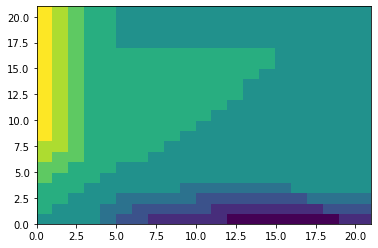



State Value Function
[[ 0.         15.18277954 28.91497505 39.74600249 49.64060344 56.99708871
  63.94141991 67.49781807 70.5838692  70.57773923 70.54160939 70.41692702
  70.17838412 69.86628627 69.25402434 68.28479036 67.06500802 65.82974986
  64.85286948 64.36612938 64.36612938]
 [15.18150121 29.883345   43.61554051 54.44656795 61.81330769 68.76585658
  72.32233236 75.40861632 75.40298262 75.36765243 75.2439219  75.00604765
  74.69399214 74.08104344 73.11068053 71.88988215 70.65417242 69.67729204
  69.19055194 69.19055194 69.19055194]
 [29.87534763 43.61138857 55.78152572 66.61255317 73.57535652 77.14004998
  80.22641156 80.22101071 80.18617678 80.0632459  79.82632349 79.51493663
  78.90203027 77.93098059 76.70905328 75.47232751 74.49499555 74.00825546
  74.00825546 74.00825546 74.00825546]
 [42.03125428 55.76729521 66.6060135  74.976668   81.93947135 85.03405062
  85.02872738 84.99412629 84.87169168 84.63556892 84.3251339  83.71289619
  82.74188885 81.51927477 80.28142007 79.30307

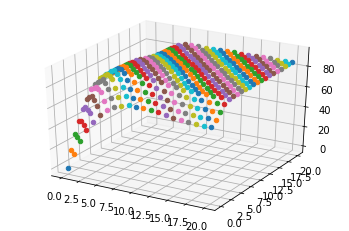

In [242]:
# Policy Iteration
%matplotlib inline
v_pi = np.zeros((max_car_available+1, max_car_available+1))
policy_s = np.zeros((max_car_available+1, max_car_available+1)) 
# we assume the policy to be deterministic so we only assign one action (optimal) to each state.

while (1):

    # Step 1: Policy Evaulation
    while (1):
        delta = 0
        for x in range(max_car_available+1):
            for y in range(max_car_available+1):
                
                v = v_pi[x, y]
                v_new = get_next_state_and_reward_jack_car(x, y, policy_s[x, y], v_pi)
    
                delta = max(abs(v - v_new), delta)
                v_pi[x, y] = v_new
                             
        if (delta < 0.1):
            break  
            
        print ('Delta : ' + str(delta))
            
    # Step 2: Policy Improvement
    policy_stable = True
    for x in range(max_car_available+1):
        for y in range(max_car_available+1):
            
            old_action = policy_s[x, y].copy()
            find_max = []
            
            for a in range(-max_car_movement+1, max_car_movement+1):
                expected_return = get_next_state_and_reward_jack_car(x, y, a, v_pi)
                find_max.append(expected_return)
            max_action = np.argmax(np.asarray(find_max))
            policy_s[x, y] = actions[max_action]
            
            
            if (not (policy_s[x, y] == old_action)):
                # check this condition
                policy_stable = False
    
    if (policy_stable):
        break
        
print ('\n')
print ('Policy = ')
print (policy_s)
        
plt.pcolor(policy_s)
plt.show()

print ('\n')
print ('State Value Function')
print (v_pi)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(max_car_available+1):
    for j in range(max_car_available+1):
        ax.scatter(i, j, v_pi[i, j])
plt.show()